In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv("canada_per_capita_income.csv")
df.head(5)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [5]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [6]:
df.isnull().sum()

year                       0
per capita income (US$)    0
dtype: int64

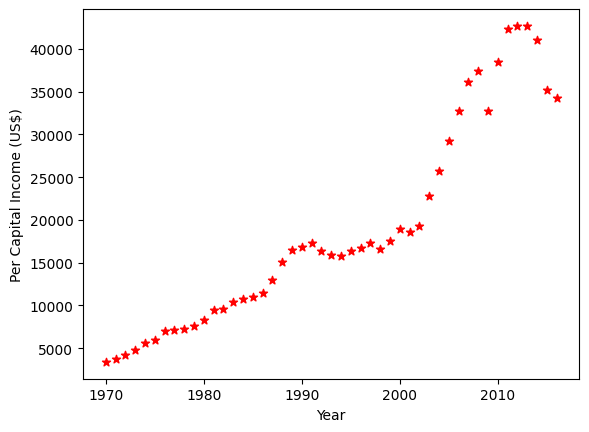

In [7]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel("Per Capital Income (US$)")
plt.scatter(df['year'], df['per capita income (US$)'], color = 'red', marker = '*')

In [8]:
x = df[["year"]]
x.head(5)

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [9]:
y = df[['per capita income (US$)']]
y.head(5)

,per capita income (US$)
0,3399.299037
1,3768.297935
2,4251.175484
3,4804.463248
4,5576.514583


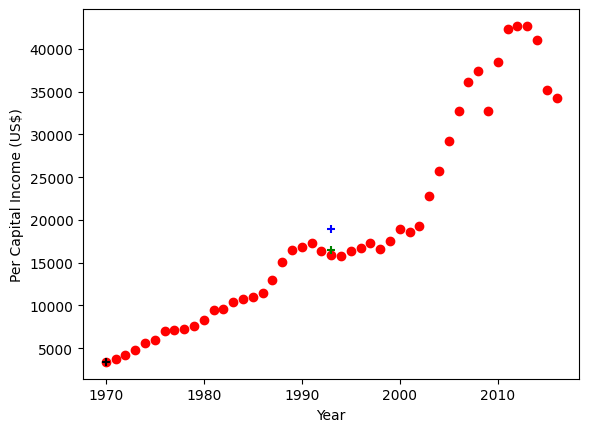

In [10]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel("Per Capital Income (US$)")
plt.scatter(df['year'], df['per capita income (US$)'], color = 'red', marker = 'o')
plt.scatter(x.mean(), y.mean(), color = 'blue', marker = '+')   
plt.scatter(x.median(), y.median(), color = 'green', marker = '+')
plt.scatter(x.mode().values[0], y.mode().values[0], color = 'black', marker = '+')

## Linear Regression

In [11]:
reg = linear_model.LinearRegression()
reg

LinearRegression()

In [12]:
reg.fit(x, y)

LinearRegression()

In [13]:
m = reg.coef_
m

array([[828.46507522]])

In [14]:
c = reg.intercept_
c

array([-1632210.75785546])

In [15]:
2020 * m + c

array([[41288.69409442]])

In [16]:
reg.predict([[2020]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41288.69409442]])

### Best-fit line

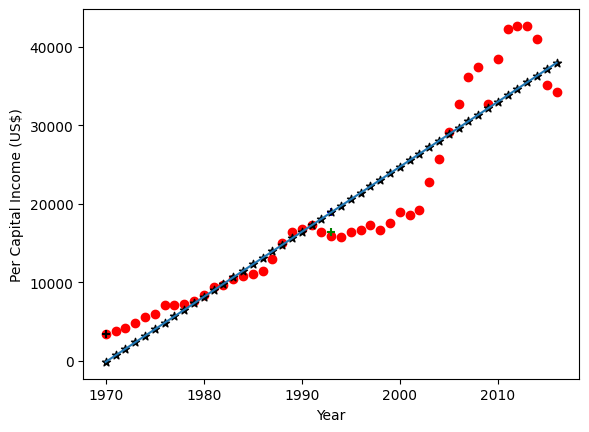

In [17]:
%matplotlib inline
plt.plot(x, reg.predict(x))
plt.xlabel('Year')
plt.ylabel("Per Capital Income (US$)")
plt.scatter(df['year'], df['per capita income (US$)'], color = 'red', marker = 'o')
plt.scatter(x.mean(), y.mean(), color = 'blue', marker = '+')   
plt.scatter(x.median(), y.median(), color = 'green', marker = '+')
plt.scatter(x.mode().values[0], y.mode().values[0], color = 'black', marker = '+')
plt.scatter(x, reg.predict(x), color = 'black', marker = '*')

In [22]:
reg.predict([[2015]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37146.3687183]])

## Performance / Accuracy

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(y, reg.predict(x))

0.890916917957032